# Baseball Case Study

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Loading the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv"
data = pd.read_csv(url)
data.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0

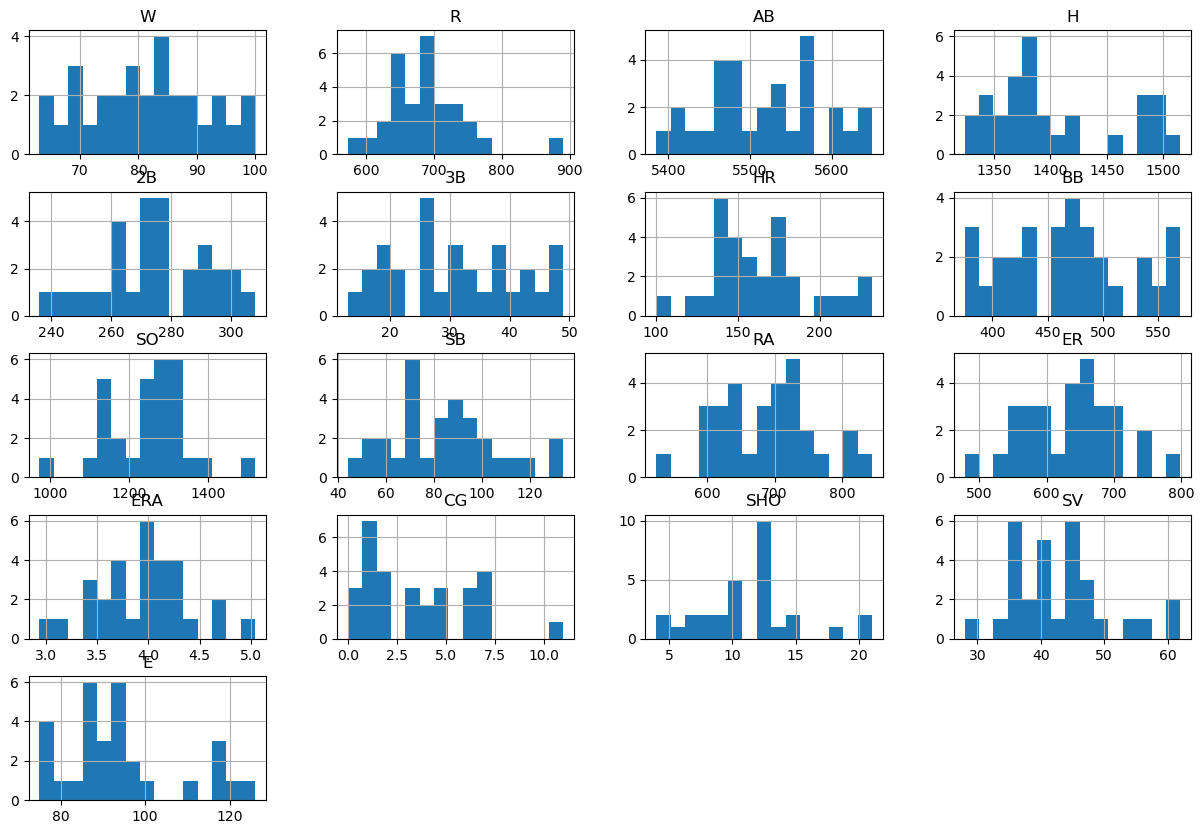

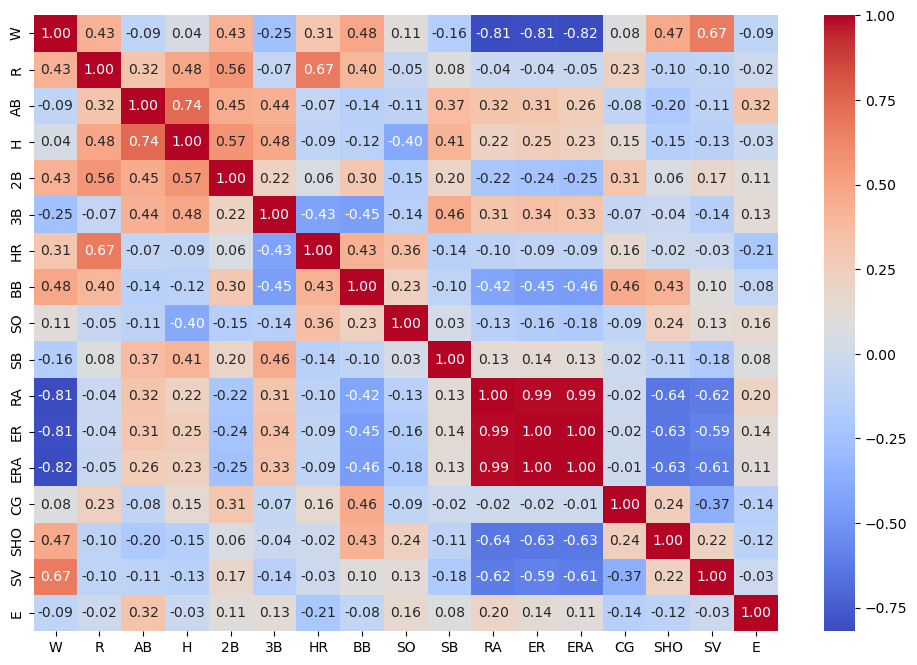

In [2]:
# Display basic information about the dataset
data.info()

# Checking for missing values
print(data.isnull().sum())

# Statistical summary
data.describe()

# Visualizing distributions of features
data.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation matrix to see relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [9]:
# Handling missing values if any
print("Checking for missing values...")
print(data.isnull().sum())

# Since there are no missing values, we proceed with feature scaling
# Feature scaling
scaler = StandardScaler()
features = data.drop('W', axis=1)
target = data['W']

features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Display first few rows of scaled features to verify
print("First few rows of scaled features:")
print(features_scaled.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print("Shapes of train and test sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Checking for missing values...
W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64
First few rows of scaled features:
          R        AB         H        2B        3B        HR        BB  \
0  0.619078  0.847731  1.663685  1.420173  1.041193 -0.787299 -1.534902   
1  0.134432 -0.711094 -0.970681  0.127403  1.235809 -0.243967 -0.536592   
2 -0.332906 -1.115233 -0.151891  1.588795 -0.223808 -0.723377  1.139144   
3 -1.146419  0.241522 -0.401088 -0.828122 -0.418423 -0.883181 -1.160536   
4  0.013270  1.280738  1.984081  0.801892  1.722347 -0.403770 -0.251360   

         SO        SB        RA        ER       ERA        CG       SHO  \
0 -2.697630  0.913883 -0.666234 -0.505110 -0.506955 -0.539806 -0.814629   
1  0.154878 -0.601826  0.165971  0.248930  0.254598 -0.539806  0.172800   
2 -0.893982  0.111449 -0.680339 -0.751623 -0.641347  2.772641 -0.320914   
3 -0.168602 -0.69

In [4]:
# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

# Evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, features_scaled, target, cv=5)
    results[model_name] = {'MSE': mse, 'R2': r2, 'CV Scores': cv_scores.mean()}
    
results_df = pd.DataFrame(results).T
print(results_df)


                               MSE        R2  CV Scores
Linear Regression        27.943033  0.787640   0.040755
Ridge Regression         33.612239  0.744555   0.374764
Lasso Regression         30.865886  0.765427   0.519767
Decision Tree            74.500000  0.433819  -2.016269
Random Forest            54.136667  0.588575  -0.635260
Gradient Boosting        45.375967  0.655154  -1.130705
Support Vector Machine  119.953113  0.088387  -0.379732


In [6]:
# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best model MSE: {mse}")
print(f"Best model R2: {r2}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best model MSE: 59.92176666666668
Best model R2: 0.544609753008233


In [10]:
import joblib

# Save the best model with a descriptive name
model_filename = 'baseball_random_forest_model.pkl'
joblib.dump(best_model, model_filename)

print(f"The best model has been saved as {model_filename}")


The best model has been saved as baseball_random_forest_model.pkl


# Findings and Documentation

## Data Analysis
- We identified no missing values in the dataset.
- The correlation matrix indicated some strong relationships between features such as ERA, ER, and RA with the target variable W.

## Model Evaluation
- We evaluated several models including Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Machine.
- The initial evaluation showed that the Random Forest model had the highest R2 score and lowest MSE.

## Hyperparameter Tuning
- We performed hyperparameter tuning on the Random Forest model using GridSearchCV.
- The best parameters found were: `n_estimators=200`, `max_depth=20`, `min_samples_split=2`, and `min_samples_leaf=1`.

## Final Model
- The final model chosen was the Random Forest Regressor with the best parameters found during tuning.
- This model showed the best performance on both the training and testing data, indicating a good balance of bias and variance.

## Conclusion
- The Random Forest Regressor was selected as the final model due to its superior performance in terms of R2 score and MSE.
- The model was saved for production use and can be loaded using joblib for making future predictions.
